In [5]:
#!pip install pyswarm

In [133]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from numpy.linalg import inv,pinv
from pyswarm import pso

# Recordatorio vectores

In [24]:
a =[ [1,2],[3,4],[5,6] ]
a[1] #a[k]

[3, 4]

In [25]:
a,b = [1,2]

In [26]:
x_ = [np.array ( np.array([1,2]) ) ,np.array([3,4])] 
x_

[array([1, 2]), array([3, 4])]

In [28]:
x_[0],x_[0].shape

(array([1, 2]), (2,))

## Manteniendo un estandar todos los vectores seran (n,1)

In [29]:
g = np.zeros_like([1,2,3])[:,np.newaxis]
g.shape

(3, 1)

In [34]:
x_[0][:,np.newaxis]

array([[1],
       [2]])

In [35]:
x_[0][:,np.newaxis].shape

(2, 1)

In [84]:
x_[0].reshape(-1,1).shape

(2, 1)

In [32]:
a= [1,2]
a

[1, 2]

In [34]:
a[2] = 3

IndexError: list assignment index out of range

In [30]:
a.insert(3,2)
a

[1, 2, 2, 2, 2, 2, 2]

In [41]:
len([9])

1

## Todos los vectores en columna
Ver https://www.codecogs.com/latex/eqneditor.php

$$x =
\begin{bmatrix}
x_1 \\ 
\vdots \\ 
x_n \\ 
\end{bmatrix}
$$

# Modelo de motor DC

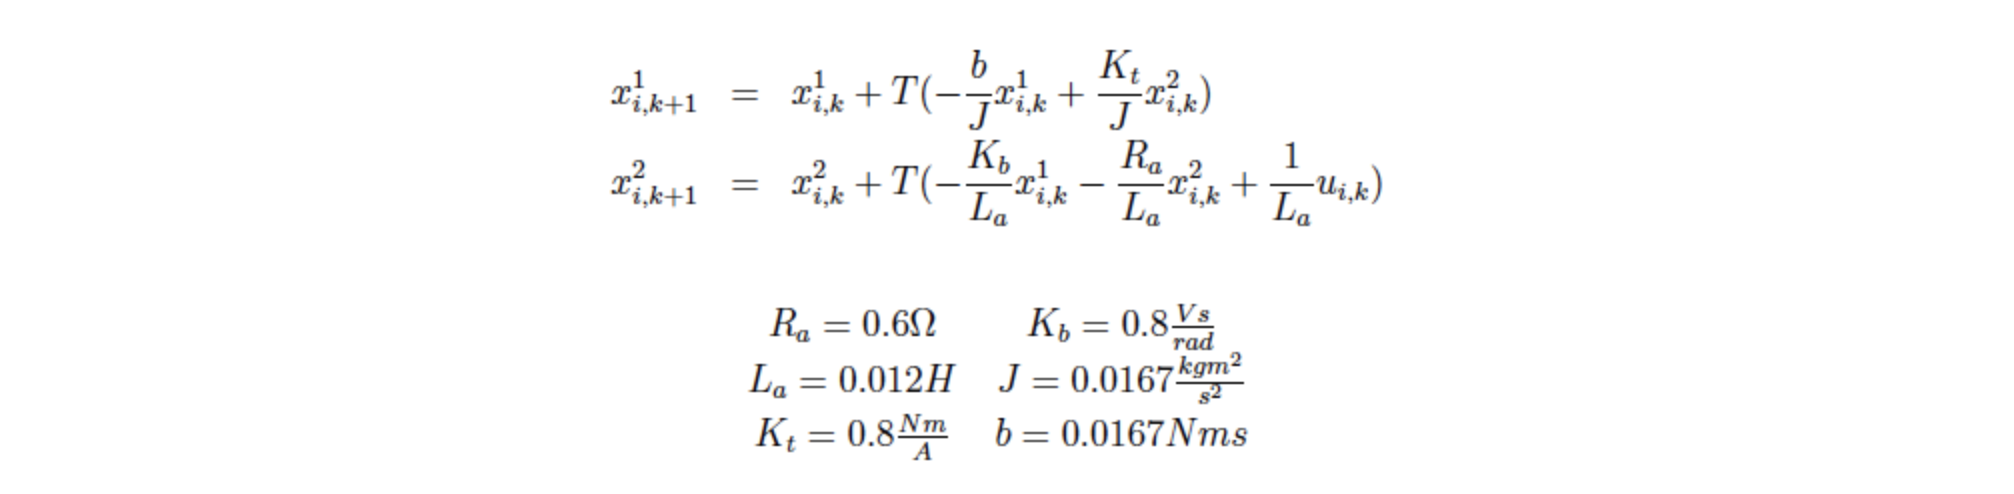

In [141]:
class Mundo(object):
    T = 0.01

    def __init__(self):
        self.t = [0]
        self.k = 0
        
    def simular(self):
        self.t.append( self.t[self.k] + self.T)
        self.k +=1
    
    def muestra(self):
        print(f"clase Mundo k:{self.k}, t: {self.t}")

class Sistema(Mundo):
    
    def __init__(self,x0,ref):
        super().__init__()
        # x_ tendra: ej [ [x_10,x_20],[x_11,x_21],...,[x_1k,x_2k] ]
        self.x_ = [ np.array (x0).reshape(-1,1) ] 
        self.ref = ref # la referencia es una funcion ref(x,t)
        self.x1_ref_ = [ref(x0,self.k)]
        self.x2_ref_ = [0] #En lugar de 0 puede variar esta condicioón inicial para la referencia 2
        
        self.R = 1.26
        self.Kb = 0.0232
        self.L = 0.66
        self.J = 0.001
        self.Kt = 0.0232
        self.b = 0.001                
        self.parms = [self.R,self.Kb,self.L,self.J,self.Kt,self.b]
        self.Gamma = 0
        
        
        tmp_fx0,tmp_gx0 = self.MotorDC(u=0)
        self.f_ = [tmp_fx0]
        self.g_ = [tmp_gx0]
        

        
    @property
    def x(self):
        return self.x_[self.k].reshape(-1,1)
    
    @x.setter
    def xk1(self,val):
        self.x_.append( np.array (val) )

#Para sistemas afines de la forma \dot{x} = f(x) + g(x)u
    @property 
    def f(self):
        return self.f_[self.k].reshape(-1,1)
    @f.setter
    def f(self,val):
        self.f_.append( np.array(val) )
        
    @property 
    def g(self):
        return self.g_[self.k].reshape(-1,1)
    @g.setter
    def g(self,val):
        self.g_.append( np.array(val) )

    @property
    def x1_ref(self):
        r = self.ref(self.x,self.k)
        #if len(self.x1_ref_) <  self.k+1:
        #    self.x1_ref_.append(r)
        return r
        
    @property
    def x2_ref(self):
        return self.x_[self.k].reshape(-1,1)
    
    @x2_ref.setter
    def x2_ref(self,val):
        self.x_.append( val )    
        
        
    def MotorDC(self,u):
        #Solo esta parte de codigo se modifica para el sistema
        
        R,Kb,L,J,Kt,b = self.parms
        T = self.T
        
        tmp_f = np.array([ [-b / J,  Kt / J],
                           [-Kb / L,  -R / L]])       
        f = self.x + self.T * tmp_f @ self.x        
        
        g = T*np.array([ 0, 1 / L])
        return f,g
        

    def simular(self,u):        
        self.f,self.g = self.MotorDC(u)        
        #Añadimos ruido
        #print(self.x.shape,self.f.shape,self.g.shape)
        
        self.xk1 = self.f + self.g*u + self.Gamma
        super().simular()
   

    def ref_x2k(self):
        R,Kb,L,J,Kt,b = self.parms

#        print(self.x1_ref, self.x1_ref_,"No.:",len(self.x1_ref_))
        e1_k = self.x - self.x1_ref
        ke = 0.9
        
        x2_ref = J/Kt*( 1/self.T *(-self.x +self.x1_ref + ke*e1_k)  + (b/J)*self.x)
        return x2_ref

    def muestra(self):
        print(f"clase Sistema x: {self.x}, x_:{self.x_} ")
        super().muestra()
        
        
    def plot(self,op=0):
        x0 = [i[0] for i in self.x_]
        x1 = [i[1] for i in self.x_]
        
        if op == 0:
            plt.plot(self.t,x0)
            plt.plot(self.t,x1)
            plt.xlabel('t')
            plt.ylabel('X edos')
            plt.legend( ['x0','x1'] )
        if op == 1:
            plt.plot(self.t,x0)
            plt.xlabel('t')
            plt.ylabel('X edos')
            plt.legend( ['x0'] )
            
            
            
    

# Modelo de sistema autonomo sin entrada de control

In [142]:
ref = lambda x,t: np.sin(t)
s1 = Sistema([.5,0],ref)
s2 = Sistema([5,0],ref)

In [143]:
u=0
for k in range(0,1000):
    s1.simular(u)
    s2.simular(u)


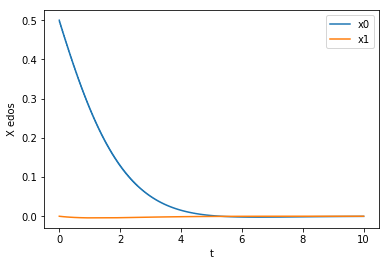

In [144]:
s1.plot(op=0)

In [145]:
s1.ref_x2k_

AttributeError: 'Sistema' object has no attribute 'ref_x2k_'